In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_neighbours(point):
    neighbours = [
        (1, -1), (1, 0),(1, 1),
        (0, -1), (0, 1),
        (1, -1), (1, 0),(-1, 1)
    ]
    for neigh in neighbours:
        yield tuple(map(sum, zip(point, neigh)))

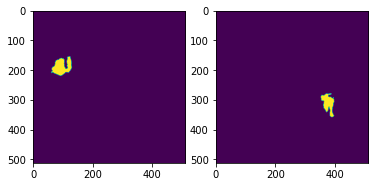

In [3]:
im = Image.open('Nkuf9.png')
data = np.array(im)[:,:,0]
wpoint = np.where(data == 255)
points = set((x, y) for x, y in zip(*wpoint) )


def find_regions(p , points):
    reg = []
    seen = set()
    def dfs(point):
        if point not in seen:
            seen.add(point)
            if point in points:
                reg.append(point)
                points.remove(point)
                for n in generate_neighbours(point):
                    dfs(n)
    dfs(p)
    return reg

region =[]

while points:
    cur = next(iter(points))
    reg = find_regions(cur, points)
    region.append(reg.copy())



areas = {idx: area for idx, area in enumerate(map(len,region))}
areas = sorted(areas.items(), key=lambda x: x[1], reverse=True)


num = 2
for idx, area in enumerate(areas[:num]):
    plt.subplot(1,num, idx + 1)
    im = np.zeros((512, 512))
    for x,y in region[area[0]]:
        im[x,y] = 255
    plt.imshow(im)
